In [2]:
#Example 7.5 YOLOv3 Detection
import numpy as np
import cv2 as cv
import os
from yolo_utils import infer_image
from types import SimpleNamespace
from IPython.display import Image, display

In [8]:
 
d = {'confidence':0.5,'threshold':0.3,
     'weights':'./yolov3.weights',
     'config':'./yolov3.cfg',
     'show_time':False}
FLAGS = SimpleNamespace(**d)
cocolabels='./coco-labels.txt'
labels = open(cocolabels).read().strip().split('\n')
print(FLAGS)
print()
print(labels)

namespace(confidence=0.5, threshold=0.3, weights='./yolov3.weights', config='./yolov3.cfg', show_time=False)

['person', 'bicycle', 'car', 'motorbike', 'aeroplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'backpack', 'umbrella', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'sofa', 'pottedplant', 'bed', 'diningtable', 'toilet', 'tvmonitor', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush']


In [9]:
colors = np.random.randint(0, 255, size=(len(labels), 3), dtype='uint8')
net = cv.dnn.readNetFromDarknet(FLAGS.config, FLAGS.weights)

layer_names = net.getLayerNames()
layer_names = [layer_names[(i - 1)] for i in net.getUnconnectedOutLayers()]
print(layer_names)      


['yolo_82', 'yolo_94', 'yolo_106']


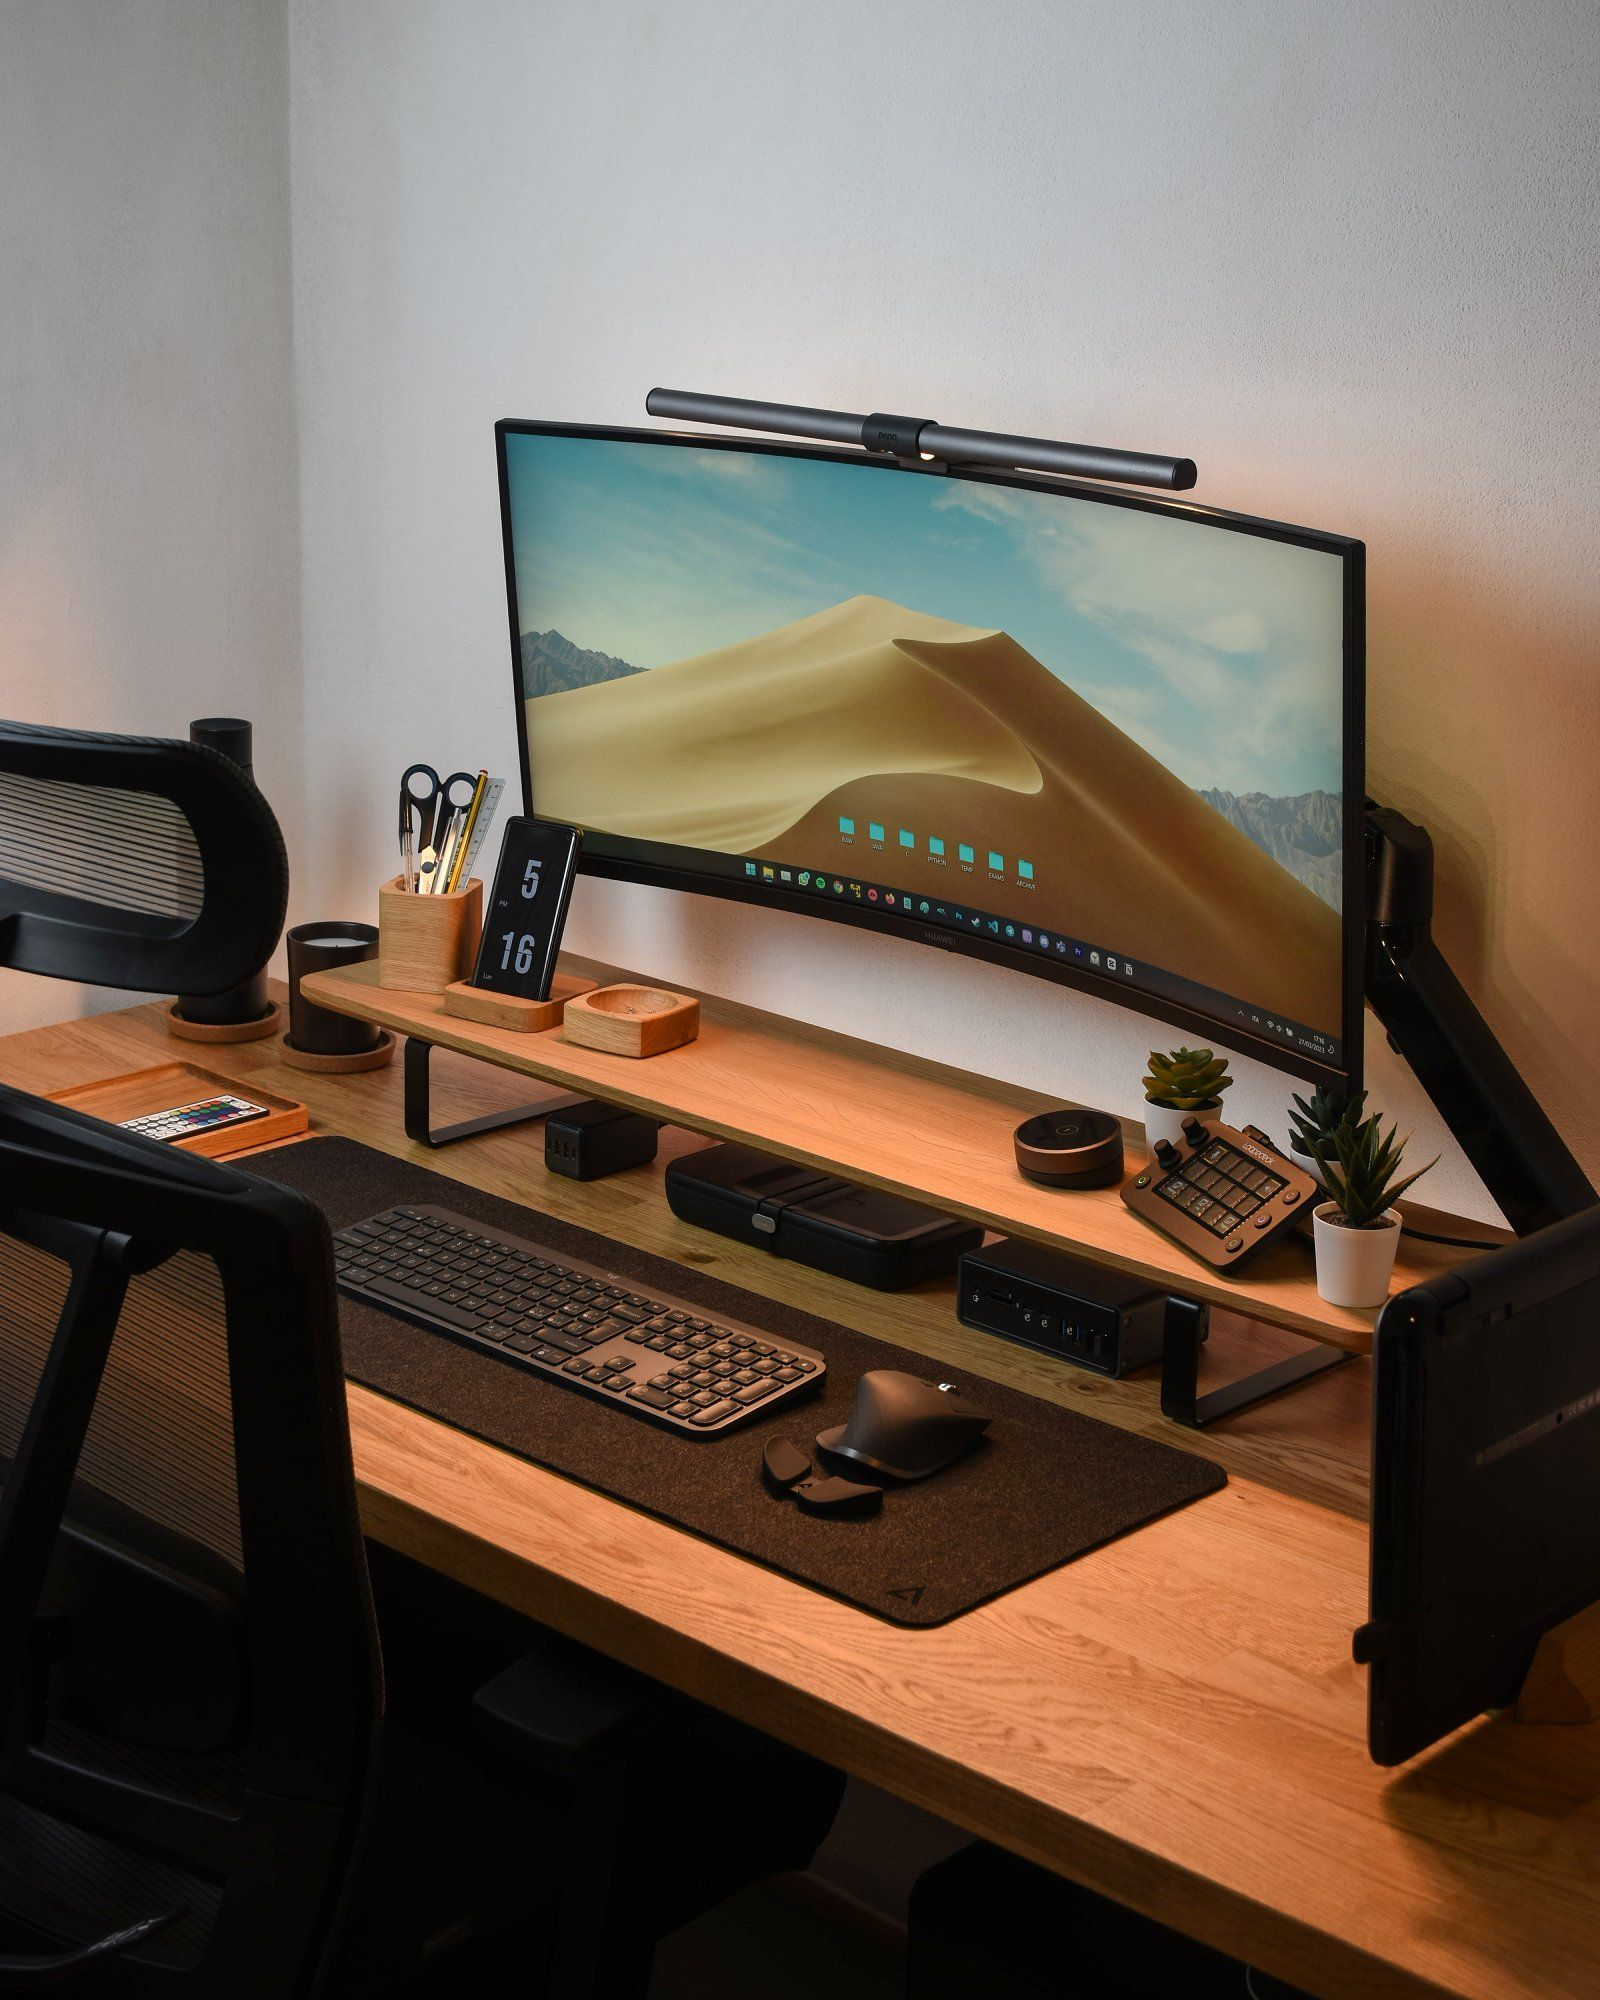

In [11]:
img = cv.imread('desk.jpg')
display(Image('desk.jpg'))

In [12]:
img = cv.resize(img, (1300,1000), interpolation = cv.INTER_AREA)
height, width = img.shape[:2]
img, boxes, confidences, classids, idxs = infer_image(net, layer_names, \
              height, width, img, colors, labels, FLAGS)
cv.imshow('image', img)
cv.waitKey(0)
cv.destroyAllWindows()

In [13]:
for i in idxs:
    print(labels[classids[i]], confidences[i])

tvmonitor 0.9995661377906799
keyboard 0.9991022944450378
mouse 0.9698866009712219
chair 0.9248673915863037
pottedplant 0.9206414222717285
